In [1]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   brightness_range=[0.5, 1.5],  # Rango para ajustar el brillo 
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest'
                                    )

test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory('Data/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_data = test_datagen.flow_from_directory('Data/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
     

Found 1680 images belonging to 6 classes.
Found 720 images belonging to 6 classes.


In [3]:
IMAGE_SIZE = (224, 224)

inception = VGG16(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)

In [4]:
inception.trainable = False

In [5]:
folders = glob('Data/Test/*')

In [6]:
print(len(folders))

6


In [7]:
x = Flatten()(inception.output)
x = Dense(200, activation='relu')(x) #200
x = Dense(100, activation='relu')(x) #100
x = Dropout(0.2)(x)
x = Dense(50, activation='relu')(x) #50
x = Dense(25, activation='sigmoid')(x) #25
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
modelo = Model(inputs=inception.input, outputs=prediction)
modelo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
modelo.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
history = modelo.fit(train_data, validation_data=test_data, epochs=60, batch_size=15)

Epoch 1/60
53/53 [==============================] - 40s 580ms/step - loss: 1.5765 - accuracy: 0.4190 - val_loss: 1.0969 - val_accuracy: 0.6944
Epoch 2/60
53/53 [==============================] - 27s 499ms/step - loss: 0.9777 - accuracy: 0.8042 - val_loss: 0.7147 - val_accuracy: 0.9181
Epoch 3/60
53/53 [==============================] - 27s 506ms/step - loss: 0.5991 - accuracy: 0.9435 - val_loss: 0.4221 - val_accuracy: 0.9667
Epoch 4/60
53/53 [==============================] - 27s 512ms/step - loss: 0.3760 - accuracy: 0.9720 - val_loss: 0.3109 - val_accuracy: 0.9694
Epoch 5/60
53/53 [==============================] - 27s 511ms/step - loss: 0.2797 - accuracy: 0.9815 - val_loss: 0.2458 - val_accuracy: 0.9778
Epoch 6/60
53/53 [==============================] - 27s 510ms/step - loss: 0.2439 - accuracy: 0.9750 - val_loss: 0.2236 - val_accuracy: 0.9750
Epoch 7/60
53/53 [==============================] - 27s 515ms/step - loss: 0.1901 - accuracy: 0.9845 - val_loss: 0.2089 - val_accuracy: 0.9597

In [11]:
modelo.save('Reconocimiento_Facial_Modelo.h5')

<function matplotlib.pyplot.show(close=None, block=None)>

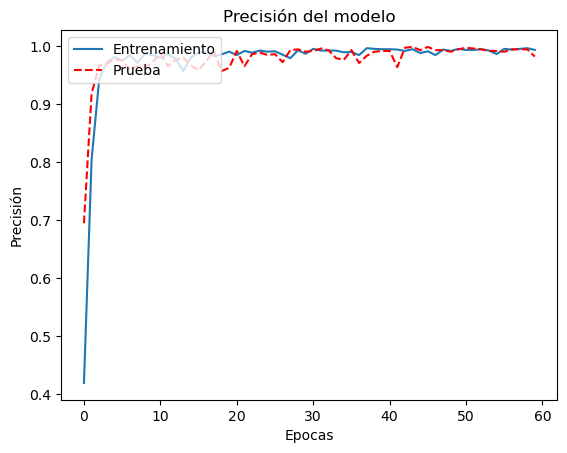

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'r--')
plt.title('Precisión del modelo')
plt.xlabel('Epocas')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.savefig('Reconocimiento_Facial_Acierto.png', dpi=300)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

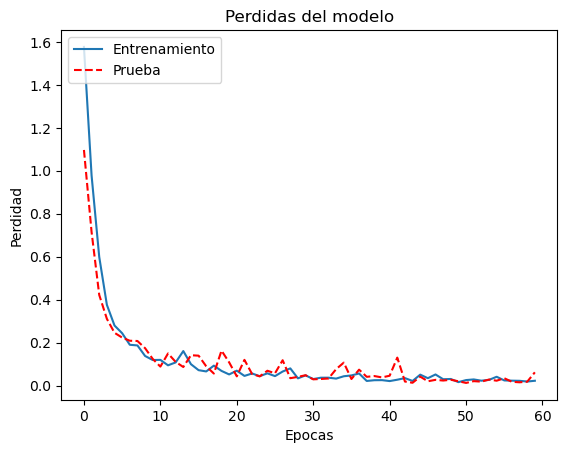

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'r--')
plt.title('Perdidas del modelo')
plt.xlabel('Epocas')
plt.ylabel('Perdidad')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.savefig('Reconocimiento_Facial_Error.png', dpi=300)
plt.show